# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# lê os dados
df = pd.read_csv('previsao_de_renda.csv')

# mantém só numéricas; remove índice sequencial se existir
num = df.select_dtypes('number').drop(columns=['index'], errors='ignore')

# checagem rápida
display(num.head())
print(f'linhas: {len(num)}  |  colunas numéricas: {list(num.columns)}')


,Unnamed: 0,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,1,36,3.575342,3.0,3369.24
1,1,0,42,0.860274,2.0,6096.14
2,2,2,31,8.065753,4.0,5658.98
3,3,0,50,1.208219,2.0,7246.69
4,4,0,52,13.873973,2.0,4017.37


linhas: 15000  |  colunas numéricas: ['Unnamed: 0', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

top2 com renda: ['tempo_emprego', 'idade'] 



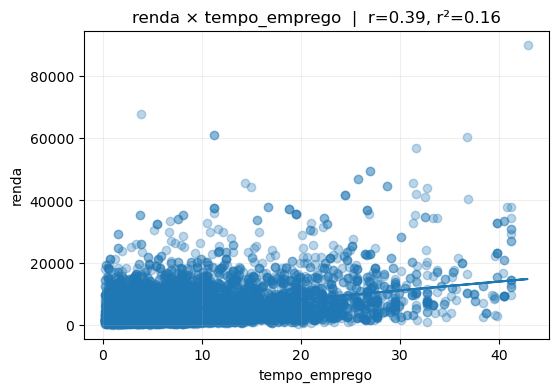

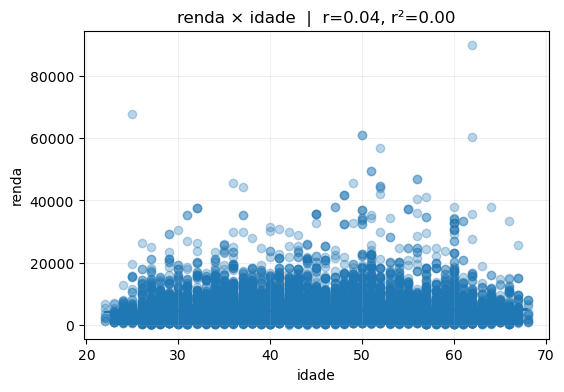

In [3]:
# base numérica
num = df.select_dtypes('number').drop(columns=['Unnamed: 0','index'], errors='ignore')

# pega top2 correlações absolutas com renda
target = 'renda'
corr = num.corr(numeric_only=True)
top2 = (corr[target]
        .drop(labels=[target])
        .abs().sort_values(ascending=False).head(2).index.tolist())

print('top2 com renda:', top2, '\n')

# scatter + linha de tendência + r
for xcol in top2:
    data = df[[xcol, target]].dropna()
    r = data[xcol].corr(data[target])
    m, b = np.polyfit(data[xcol], data[target], 1)

    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(data[xcol], data[target], alpha=0.3)
    ax.plot(data[xcol], m*data[xcol] + b)
    ax.set_xlabel(xcol); ax.set_ylabel(target)
    ax.set_title(f'{target} × {xcol}  |  r={r:.2f}, r²={r**2:.2f}')
    ax.grid(True, alpha=0.2)
    plt.show()

3) Na su aopinião, há outliers na variável renda?

Q1=1945.74  Q3=5642.36  IQR=3696.62
limites: [-3599.20, 11187.30]
outliers abaixo: 0  |  acima: 1026  |  total: 1026


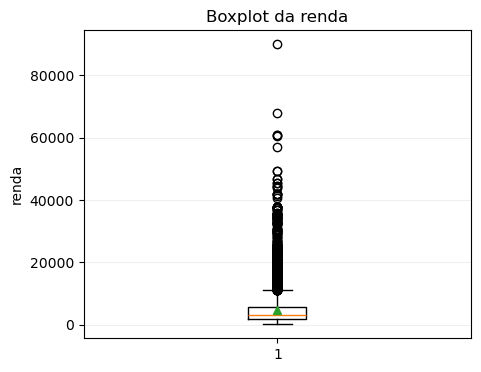

In [4]:
r = df['renda'].dropna()
q1, q3 = r.quantile([0.25, 0.75])
iqr = q3 - q1
low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
n_low = (r < low).sum(); n_high = (r > high).sum()

print(f'Q1={q1:.2f}  Q3={q3:.2f}  IQR={iqr:.2f}')
print(f'limites: [{low:.2f}, {high:.2f}]')
print(f'outliers abaixo: {n_low}  |  acima: {n_high}  |  total: {n_low + n_high}')

fig, ax = plt.subplots(figsize=(5,4))
ax.boxplot(r, vert=True, showmeans=True)
ax.set_ylabel('renda'); ax.set_title('Boxplot da renda')
ax.grid(True, axis='y', alpha=0.2)
plt.show()

4) Calcule o logaritmo da variável renda e repita a sequência de análise

,log_renda
log_renda,1.000000
renda,0.835734
tempo_emprego,0.379556
qt_pessoas_residencia,0.036267
idade,0.024712
qtd_filhos,0.023743


top2 com log_renda: ['tempo_emprego', 'qt_pessoas_residencia'] 



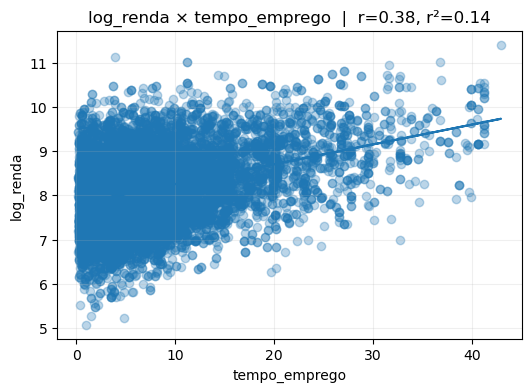

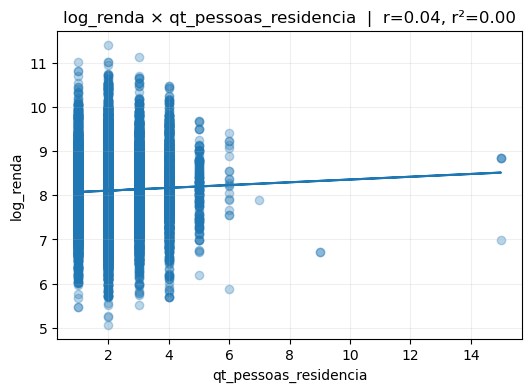

In [5]:
# log natural; evita log(0)
df['log_renda'] = np.log(df['renda'].clip(lower=1))
num_log = df.select_dtypes('number').drop(columns=['Unnamed: 0','index'], errors='ignore')

# novas correlações
corr_log = num_log.corr(numeric_only=True)
display(corr_log[['log_renda']].sort_values('log_renda', ascending=False))

# top2 vs log_renda
top2_log = (corr_log['log_renda']
            .drop(labels=['log_renda','renda'], errors='ignore')
            .abs().sort_values(ascending=False).head(2).index.tolist())
print('top2 com log_renda:', top2_log, '\n')

for xcol in top2_log:
    data = df[[xcol, 'log_renda']].dropna()
    r = data[xcol].corr(data['log_renda'])
    m, b = np.polyfit(data[xcol], data['log_renda'], 1)

    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(data[xcol], data['log_renda'], alpha=0.3)
    ax.plot(data[xcol], m*data[xcol] + b)
    ax.set_xlabel(xcol); ax.set_ylabel('log_renda')
    ax.set_title(f'log_renda × {xcol}  |  r={r:.2f}, r²={r**2:.2f}')
    ax.grid(True, alpha=0.2)
    plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

   A transformação logarítmica melhora a forma da variável renda — reduz assimetria e atenua a influência de extremos (havia ~1.026 observações acima do limite superior pelo IQR) —, deixando os gráficos mais estáveis para modelagem. Entretanto, não aumentou a força das relações lineares: a correlação com tempo_emprego passou de r≈0,39 para r≈0,38 (r²≈0,16→0,14) e com qt_pessoas_residencia permaneceu r≈0,04.

   Síntese: o log é benéfico para estabilidade e interpretação estatística, mas não altera substancialmente as associações lineares observadas. Para modelagem, recomenda-se usar log_renda como alvo e considerar relações não lineares/interações para ganhos de explicação.